### 목표 : 부족한 피처를 조합 및 생성하여 모델 성능 향상
- 특성 공학 -> 피처 추출 / 선택 / 생성
- 비선형의 데이터에 대한 피처 생성 ===> 곡선형태의 회귀선 수식을 찾고자 함.
- 모  듈 : sklearn.preprocessing 내에 포함
- 데이터 : fish.csv
- 피  처 : perch의 height, Length, Width
- 타  겟 : perch의 weight
- 학습 유형 : 지도학습 (指導)

[1] 전처리 피처 조합 생성 살펴보기

In [121]:
# 모듈 로딩
from sklearn.preprocessing import PolynomialFeatures

In [122]:
# 인스턴스 생성
poly = PolynomialFeatures(include_bias=False) # 

In [123]:
poly.fit([[2,3]])

PolynomialFeatures(include_bias=False)

In [124]:
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [125]:
poly = PolynomialFeatures(include_bias=False, degree = 5) # 
poly.fit([[2, 3]])

PolynomialFeatures(degree=5, include_bias=False)

In [126]:
poly.get_feature_names_out() # 5승까지 계산.

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

[2] perch 데이터를 최대한 만족하는 회귀선을 찾기

[2-1] 모듈로딩 및 데이터 준비
<hr>

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
data_file = '../data/fish.csv'
dataDF = pd.read_csv(data_file)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [129]:
# 불필요한 컬럼 제거.
dataDF = dataDF.drop('Diagonal', axis = 'columns').copy()
dataDF.head(2)

,Species,Weight,Length,Height,Width
0,Bream,242.0,25.4,11.52,4.0200
1,Bream,290.0,26.3,12.48,4.3056


In [130]:
# Perch행만 추출
perchDF = dataDF[dataDF.Species == 'Perch']

In [131]:
perchDF = perchDF.drop('Species', axis = 'columns').copy()
perchDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 72 to 127
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
 2   Height  56 non-null     float64
 3   Width   56 non-null     float64
dtypes: float64(4)
memory usage: 2.2 KB


In [189]:
# 행 인덱스 초기화
perchDF = perchDF.reset_index(drop=True)
perchDF.head(2)
poly = PolynomialFeatures(include_bias=False) # include_bias = False : 0번 컬럼에 생기는 1.0 행을 없앨 수 있음. 뭔진 모름. 
poly.fit(perchDF)

perch_poly = pd.DataFrame(poly.transform(perchDF) ,columns=poly.get_feature_names_out())
#perch_poly

In [192]:
# for col in perch_poly.columns.to_list() :
#     if 'Weight' in col :
#         perch_poly = perch_poly.drop(f'{col}', axis='columns')
# print(perch_poly.columns)

Index(['Length', 'Height', 'Width', 'Length^2', 'Length Height',
       'Length Width', 'Height^2', 'Height Width', 'Width^2'],
      dtype='object')


[2-2] 데이터 확인 <hr>
- 학습 유형 결정을 위한 단계
- 피처 스케일링 진행 여부 체크

In [138]:
# 타겟/피처 지정
targetSR = perchDF['Weight']
featureDF = perchDF.iloc[:,1:]

In [158]:
# 시각화를 통해서 분포 확인 
def print_feature(nrows, ncols, df, target, features, corrs) : 
    plt.figure(figsize=(10, 10))
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.scatter(df[target], df[features[idx]], label =f'corr : {corrs[idx]:.2}')
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.legend()
    plt.tight_layout() # 간격 안 맞는 거 맞춰주는 건가..?
    plt.show()

In [159]:
corrList = perchDF.corr()['Weight'].to_list()

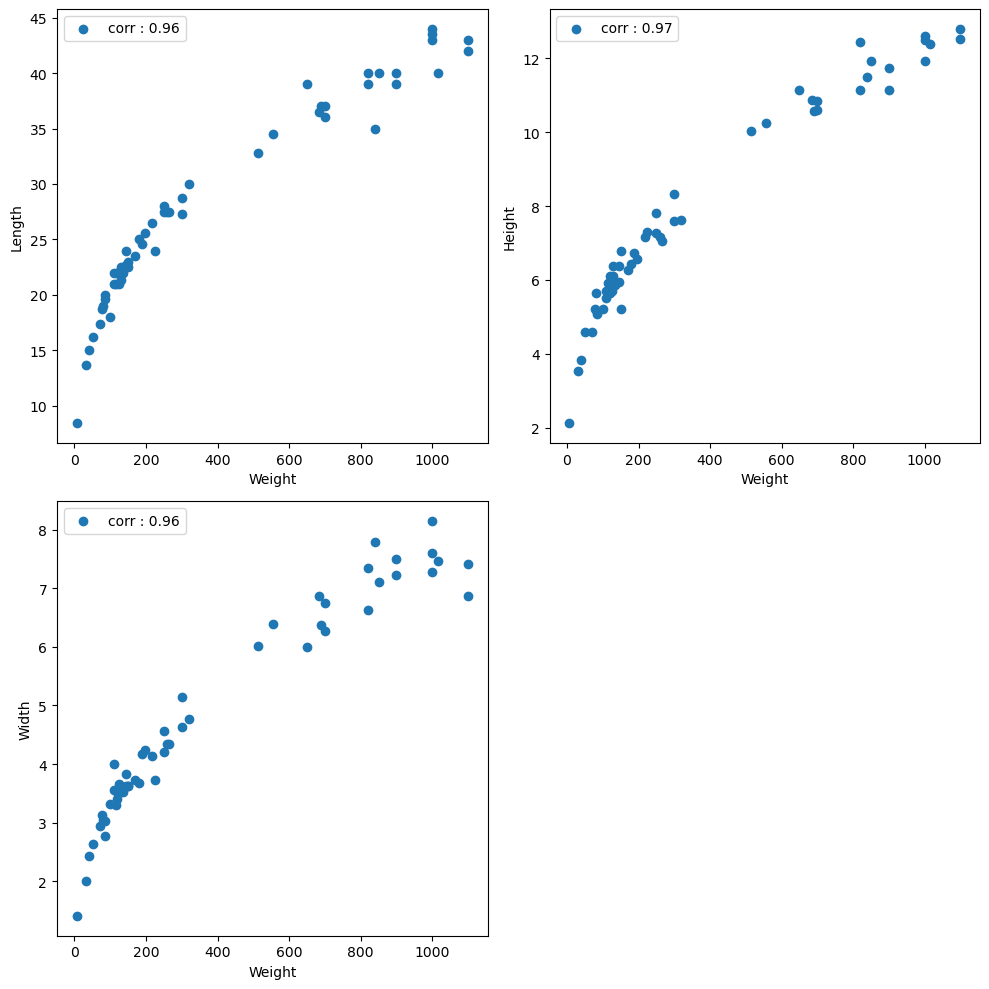

In [160]:
print_feature(2, 2, perchDF, perchDF.columns[0], perchDF.columns[1:], corrList[1:])

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size = 0.3, random_state=3)

In [162]:
print(f'[훈련용] X_train : {X_train.shape}')
print(X_train.head(2))

print(f'\n[테스트용] X_test : {X_test.shape}')
print(X_test.head(2))
print(f'\n[훈련용] y_train : {y_train.shape}')
print(y_train.head(2))
print(f'\n[테스트용] y_test : {y_test.shape}')
print(y_test.head(2))

[훈련용] X_train : (39, 3)
    Length  Height  Width
16    22.0    6.11  3.525
15    22.0    5.64  3.525

[테스트용] X_test : (17, 3)
    Length  Height   Width
12    21.0  5.6925  3.6675
34    28.0  7.8204  4.2042

[훈련용] y_train : (39,)
16    130.0
15    120.0
Name: Weight, dtype: float64

[테스트용] y_test : (17,)
12    125.0
34    250.0
Name: Weight, dtype: float64


In [163]:
from sklearn.linear_model import LinearRegression

def print_score(n, modelname, scaled_x_train, scaled_x_test) :
    train_scoreList =[]
    test_scoreList =[]
    for i in range(n) :
        model = modelname()
        model.fit(scaled_x_train, y_train)
        train_score = model.score(scaled_x_train, y_train)
        test_score = model.score(scaled_x_test, y_test)
        train_scoreList.append(train_score)
        test_scoreList.append(test_score)

    print(f'모델파라미터] ====>\ncoef_: {model.coef_}\nintercept_ : {model.intercept_}')
    print(f'Train Score{i+1} : {train_score} --- Test Score{i+1} : {test_score}\n')
    print(f'max train score : {max(train_scoreList)} --- max test Score : {max(test_scoreList)}')
    print(f'min train score : {min(train_scoreList)} --- min test Score : {min(test_scoreList)}\n')


In [164]:
print_score(30, LinearRegression, X_train, X_test)

모델파라미터] ====>
coef_: [ -2.29682274  52.03773896 106.13001256]
intercept_ : -471.0524618040331
Train Score30 : 0.9407028171541708 --- Test Score30 : 0.9279916877852047

max train score : 0.9407028171541708 --- max test Score : 0.9279916877852047
min train score : 0.9407028171541708 --- min test Score : 0.9279916877852047

